In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.utils import resample
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
%matplotlib inline
import pandas as pd

In [17]:
df = pd.read_csv('Data/year_prediction.csv')
df.sample(5)

,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
334803,1985,46.34699,21.74792,43.20305,-0.83622,7.66835,-8.66641,-12.09900,2.59133,-6.07927,...,-5.59296,-114.96763,21.82270,134.26939,-16.24234,114.88791,245.32982,24.99388,93.66974,16.11580
475405,2007,47.89205,8.69839,-14.17686,-12.64380,16.14131,-11.46458,-5.28444,-6.33923,0.68068,...,-4.42509,27.30452,-17.25015,15.23684,24.69891,74.17394,-104.78806,-2.85217,-14.07242,-16.85216
203316,1988,26.27709,-64.70140,-40.21739,-7.86816,11.03987,14.41071,-19.65411,21.69806,3.08984,...,114.36372,-139.29020,-42.73795,-7.85396,33.86304,22.04797,227.70022,0.66504,-326.28267,29.79395
204269,2006,41.35574,-26.84277,-32.90387,34.31536,-9.49399,18.45325,10.42986,-26.42399,9.04044,...,11.13477,-327.97643,-9.43259,243.02892,-2.06648,271.06917,278.22086,37.95651,346.35280,9.91162
222793,1997,48.57287,16.39869,1.71888,-4.07484,-13.60929,-12.17339,-1.53344,-5.58214,-9.98705,...,-16.78024,77.70093,-50.36610,7.83442,-7.82459,44.83012,-61.64017,-5.40036,91.62642,3.46255


In [18]:
# Group release years into decades
df['label'] = df.label.apply(lambda year : year-(year%10))

Text(0.5, 1.0, 'Samples in the dataset/release decade')

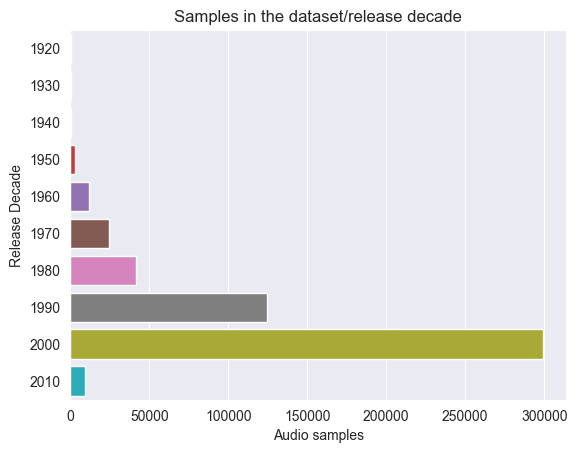

In [19]:
sns.countplot(y="label", data=df)
plt.xlabel("Audio samples")
plt.ylabel("Release Decade")
plt.title("Samples in the dataset/release decade")

In [20]:
df.iloc[:,1:] = (df.iloc[:,1:]-df.iloc[:,1:].min())/(df.iloc[:,1:].max() - df.iloc[:,1:].min())
df.iloc[:,1:].describe()

,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,0.691420,0.469220,0.496370,0.317065,0.395025,0.291384,0.515292,0.354893,0.477338,0.426704,...,0.354641,0.487939,0.368868,0.649008,0.567965,0.466491,0.600212,0.343834,0.503537,0.361319
std,0.100755,0.071524,0.056533,0.033315,0.051486,0.051839,0.040408,0.039970,0.038797,0.064036,...,0.025103,0.019795,0.024342,0.019669,0.026832,0.016751,0.024320,0.019081,0.012494,0.020852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.634423,0.431296,0.464117,0.297366,0.363241,0.255425,0.492028,0.331428,0.455263,0.384271,...,0.340902,0.480489,0.356416,0.640192,0.556182,0.459281,0.589698,0.333791,0.498181,0.351738
50%,0.705890,0.479105,0.499284,0.313357,0.396254,0.284665,0.516247,0.355178,0.477685,0.425735,...,0.349492,0.490235,0.366329,0.648116,0.568804,0.466188,0.600926,0.341917,0.502710,0.360114
75%,0.765261,0.517524,0.530202,0.332624,0.427220,0.320143,0.539971,0.378515,0.500192,0.468526,...,0.362867,0.497739,0.378451,0.657254,0.581505,0.473829,0.611214,0.351711,0.508002,0.369201
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df_t = df[df.label>1940]
min_samples = df_t.label.value_counts().min()
decades = df_t.label.unique()
df_sampled = pd.DataFrame(columns=df_t.columns)
for decade in decades:
    df_sampled = pd.concat([df_sampled, df_t[df_t.label==decade].sample(min_samples)])
df_sampled.label = df_sampled.label.astype(int)

Index(['label', 'TimbreAvg1', 'TimbreAvg2', 'TimbreAvg3', 'TimbreAvg4',
       'TimbreAvg5', 'TimbreAvg6', 'TimbreAvg7', 'TimbreAvg8', 'TimbreAvg9',
       'TimbreAvg10', 'TimbreAvg11', 'TimbreAvg12', 'TimbreCovariance1',
       'TimbreCovariance2', 'TimbreCovariance3', 'TimbreCovariance4',
       'TimbreCovariance5', 'TimbreCovariance6', 'TimbreCovariance7',
       'TimbreCovariance8', 'TimbreCovariance9', 'TimbreCovariance10',
       'TimbreCovariance11', 'TimbreCovariance12', 'TimbreCovariance13',
       'TimbreCovariance14', 'TimbreCovariance15', 'TimbreCovariance16',
       'TimbreCovariance17', 'TimbreCovariance18', 'TimbreCovariance19',
       'TimbreCovariance20', 'TimbreCovariance21', 'TimbreCovariance22',
       'TimbreCovariance23', 'TimbreCovariance24', 'TimbreCovariance25',
       'TimbreCovariance26', 'TimbreCovariance27', 'TimbreCovariance28',
       'TimbreCovariance29', 'TimbreCovariance30', 'TimbreCovariance31',
       'TimbreCovariance32', 'TimbreCovariance33', 'Timb

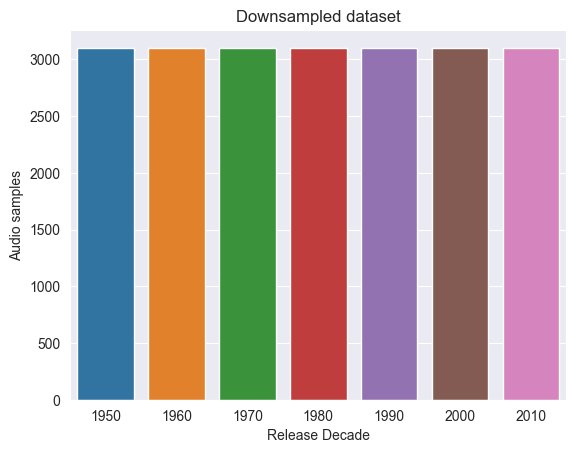

In [22]:
sns.countplot(x="label", data=df_sampled)
plt.ylabel("Audio samples")
plt.xlabel("Release Decade")
plt.title("Downsampled dataset")
df_sampled.columns

In [32]:
import numpy as np
# Load the dataset
data = df_sampled.copy()
y = data['label'] # Extract feature values
X = data.drop(columns='label',axis=1) # Extract label values

# Normalize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
data.to_csv('msd_sampled.csv')

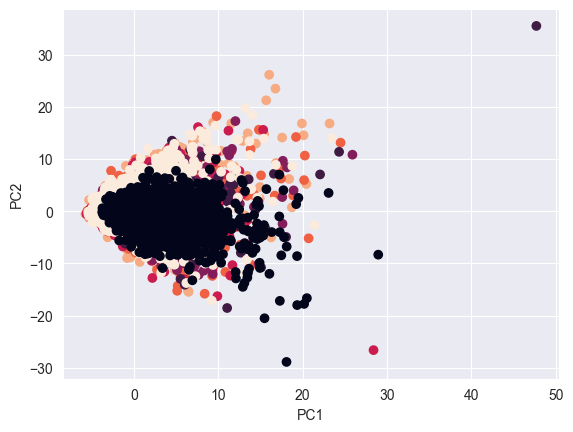

In [23]:
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset
data = df_sampled.copy()
y = data['label'] # Extract feature values
X = data.drop(columns='label',axis=1) # Extract label values

# Normalize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Perform PCA with 2 components
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

# Visualize the results
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [24]:
X_pca.shape

(21714, 30)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)





Accuracy: 0.36610637807966845


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score


classifiers = ['LinearSVM', 'RadialSVM',
               'Logistic',  'RandomForest',
               'AdaBoost',  'DecisionTree',
               'KNeighbors','GradientBoosting']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]
models = [DecisionTreeClassifier(random_state=0)] #test dt
def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))

# Adapted Version
def initialization_of_population(size, n_feat):
    population = np.random.rand(size, n_feat) < 0.3
    return population.astype(np.bool_)

def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        score = accuracy_score(Y_test,predictions)
        scores.append((score, chromosome))
    sorted_array = sorted(scores, key=lambda x: x[0],reverse = True)
    sorted_scores, sorted_population = zip(*sorted_array)
    return list(sorted_scores), list(sorted_population)

def selection(sorted_population,parent_chromosome_number):
    next_generation_population = []
    for i in range(parent_chromosome_number):
        next_generation_population.append(sorted_population[i])
    return next_generation_population

def crossover(parent_population):
    next_generation_population = []
    next_generation_population.extend(parent_population)
    for i in range(0,len(parent_population),2):
        new_chromosome = []
        child_1 = parent_population[i]
        child_2 = parent_population[i+1]
        crossover_point = len(child_1)//2
        new_chromosome = np.concatenate((child_1[:crossover_point],child_2[crossover_point:]))
        next_generation_population.append(new_chromosome)
    return next_generation_population

def mutation(population, mutation_rate,n_feat):
    next_generation_population = []
    mutation_number = int(mutation_rate*n_feat)
    for index,chromosome in enumerate(population):
        if index == 0:
            next_generation_population.append(chromosome)
            continue
        mutation_position = []
        new_chromosome = chromosome.copy()
        for i in range(0,mutation_number):
            position = randint(0,n_feat-1)
            mutation_position.append(position)
        for pos in mutation_position:
            new_chromosome[pos] = not chromosome[pos]
        next_generation_population.append(new_chromosome)
    return next_generation_population


def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train, X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initialization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[0])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score


In [27]:
logmodel = RandomForestClassifier(random_state=0)
X_pca = pd.DataFrame(X_pca)
Y = pd.DataFrame(y)
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

In [28]:
chromo_df_song,score_song=generations(X_pca,y,size=80,n_feat=X_pca.shape[1],n_parents=64,mutation_rate=0.20,n_gen=100,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

Best score in generation 1 : 0.3170619387520147
Best score in generation 2 : 0.355054110062169
Best score in generation 3 : 0.355054110062169
Best score in generation 4 : 0.355054110062169
Best score in generation 5 : 0.359889477319825
Best score in generation 6 : 0.3601197329035229
Best score in generation 7 : 0.3601197329035229
Best score in generation 8 : 0.3601197329035229
Best score in generation 9 : 0.3601197329035229
Best score in generation 10 : 0.37025097858623074
Best score in generation 11 : 0.37025097858623074


KeyboardInterrupt: 

In [29]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
df = df_sampled.copy()
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


ModuleNotFoundError: No module named 'tensorflow'